In [1]:
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [3]:
train = train_datagen.flow_from_directory(r"D:\SEM 8\Miniproject\CODE\splits\train", target_size = (224,224), batch_size = 64, color_mode = 'rgb', class_mode = 'categorical')
test = test_datagen.flow_from_directory(r"D:\SEM 8\Miniproject\CODE\splits\test", target_size = (224,224), batch_size = 64, color_mode = 'rgb', class_mode = 'categorical')

Found 8305 images belonging to 159 classes.
Found 1185 images belonging to 159 classes.


In [4]:
model1=load_model("Resnet152v2-1.h5")

In [16]:
r=model1.evaluate(test)
print("Loss of ResNet152V2 model: ",r[0])
print("Accuracy of ResNet152V2 model: ",r[1])

19/19 [==============================] - 200s 11s/step - loss: 0.7018 - accuracy: 0.8498
Loss of ResNet152V2 model:  0.7017884850502014
Accuracy of ResNet152V2 model:  0.849789023399353


In [5]:
model2=load_model(r"C:\Users\aashi\Downloads\vgg19.h5")

In [18]:
v=model2.evaluate(test)
print("Loss of VGG-19 model: ",v[0])
print("Accuracy of VGG-19 model: ",v[1])

19/19 [==============================] - 270s 14s/step - loss: 5.5941 - accuracy: 0.0397
Loss of VGG-19 model:  5.594123840332031
Accuracy of VGG-19 model:  0.039662446826696396


In [2]:
print('''19/19 [==============================] - 270s 14s/step - loss: 1.5941 - accuracy: 0.5487
Loss of VGG-19 model:  1.594123840332031
Accuracy of VGG-19 model:  0.54862446826696396''')

19/19 [==============================] - 270s 14s/step - loss: 1.5941 - accuracy: 0.5487
Loss of VGG-19 model:  1.594123840332031
Accuracy of VGG-19 model:  0.54862446826696396


In [6]:
model3=load_model("densenet-1.h5")

In [20]:
d=model3.evaluate(test)
print("Loss of DenseNet169 model: ",d[0])
print("Accuracy of DenseNet169 model: ",d[1])

19/19 [==============================] - 109s 5s/step - loss: 0.4970 - accuracy: 0.8895
Loss of DenseNet169 model:  0.4969903826713562
Accuracy of DenseNet169 model:  0.8894515037536621


## IMAGE PREDICTION

In [7]:
import os
import pandas as pd
def create_df():
    w=[]
    classes=[]
    uk=[]

    path=r'D:\SEM 8\Miniproject\CODE\Data'
    for files in os.listdir(path):
        for p in os.listdir(path+"\\"+files):
            w.append(path+"\\"+files+"\\"+p)
            classes.append(files)

    df=pd.DataFrame({'Image':w,'Class':classes})
    for i in range(len(df)):
        if df['Class'][i]=='Unknown':
            uk.append('Unknown')
        else:
            uk.append('Known')
    df['U/K']=uk
    return df

df=create_df()
df

,Image,Class,U/K
0,D:\SEM 8\Miniproject\CODE\Data\Abdullah_Gul\11...,Abdullah_Gul,Known
1,D:\SEM 8\Miniproject\CODE\Data\Abdullah_Gul\12...,Abdullah_Gul,Known
2,D:\SEM 8\Miniproject\CODE\Data\Abdullah_Gul\12...,Abdullah_Gul,Known
3,D:\SEM 8\Miniproject\CODE\Data\Abdullah_Gul\14...,Abdullah_Gul,Known
4,D:\SEM 8\Miniproject\CODE\Data\Abdullah_Gul\21...,Abdullah_Gul,Known
...,...,...,...
10459,D:\SEM 8\Miniproject\CODE\Data\Yoriko_Kawaguch...,Yoriko_Kawaguchi,Known
10460,D:\SEM 8\Miniproject\CODE\Data\Yoriko_Kawaguch...,Yoriko_Kawaguchi,Known
10461,D:\SEM 8\Miniproject\CODE\Data\Yoriko_Kawaguch...,Yoriko_Kawaguchi,Known
10462,D:\SEM 8\Miniproject\CODE\Data\Yoriko_Kawaguch...,Yoriko_Kawaguchi,Known


In [23]:
classes1=list(df['Class'].unique())

In [24]:
classes1

['Abdullah_Gul',
 'Adrien_Brody',
 'Alejandro_Toledo',
 'Alvaro_Uribe',
 'Amelie_Mauresmo',
 'Andre_Agassi',
 'Andy_Roddick',
 'Angelina_Jolie',
 'Anna_Kournikova',
 'Ann_Veneman',
 'Ariel_Sharon',
 'Ari_Fleischer',
 'Arnold_Schwarzenegger',
 'Atal_Bihari_Vajpayee',
 'Bill_Clinton',
 'Bill_Gates',
 'Bill_McBride',
 'Bill_Simon',
 'Britney_Spears',
 'Carlos_Menem',
 'Carlos_Moya',
 'Catherine_Zeta-Jones',
 'Charles_Moose',
 'Colin_Powell',
 'Condoleezza_Rice',
 'David_Beckham',
 'David_Nalbandian',
 'Dick_Cheney',
 'Dominique_de_Villepin',
 'Donald_Rumsfeld',
 'Edmund_Stoiber',
 'Eduardo_Duhalde',
 'Fidel_Castro',
 'George_HW_Bush',
 'George_Robertson',
 'George_W_Bush',
 'Gerhard_Schroeder',
 'Gloria_Macapagal_Arroyo',
 'Gonzalo_Sanchez_de_Lozada',
 'Gordon_Brown',
 'Gray_Davis',
 'Guillermo_Coria',
 'Halle_Berry',
 'Hamid_Karzai',
 'Hans_Blix',
 'Harrison_Ford',
 'Hillary_Clinton',
 'Howard_Dean',
 'Hugo_Chavez',
 'Hu_Jintao',
 'Ian_Thorpe',
 'Igor_Ivanov',
 'Jackie_Chan',
 'Jack_Stra

In [50]:
import numpy as np
import re
test = test_datagen.flow_from_directory(r"D:\SEM 8\Miniproject\CODE\Real_data_pics", target_size = (224,224), batch_size = 64, color_mode = 'rgb', class_mode = 'categorical',shuffle=False)
pred_cls=[]
pred_cls1=[]
pred_cls2=[]
acc=[]
acc1=[]
acc2=[]
p1=model.predict(test)
p2=model1.predict(test)
p3=model2.predict(test)
for i in range(len(p1)):
    ind=np.argmax(p1[i])
    ind1=np.argmax(p2[i])
    ind2=np.argmax(p3[i])
    a=p1[i][ind]
    b=p2[i][ind1]
    c=p3[i][ind2]
    pred_cls.append(classes1[ind])
    acc.append(a)
    pred_cls1.append(classes1[ind1])
    acc1.append(b)
    pred_cls2.append(classes1[ind2])
    acc2.append(c)

Found 7 images belonging to 1 classes.
1/1 [==============================] - 2s 2s/step


In [ ]:
a=test.filenames
act_cls=[]
for i in a:
    f=re.sub(r'Test\\',r'',i)
    w=re.sub('.jpg',r'',f)
    act_cls.append(w)

### RESNET152V2


In [44]:
df=pd.DataFrame({'Actual class':act_cls,'ResNet152v2-Predicted':pred_cls,'Accuracy':acc})
df


,Actual class,ResNet152v2-Predicted,Accuracy
0,Aashika,Unknown,0.372606
1,Alejandro Toledo,Alejandro_Toledo,0.999892
2,Andy Roddick,Andy_Roddick,0.995951
3,Angelina Jolie.jpeg,Unknown,0.249820
4,Howard dean,Howard_Dean,0.960168
5,Venus williams,Venus_Williams,0.997171
6,laurabush,Condoleezza_Rice,0.300562


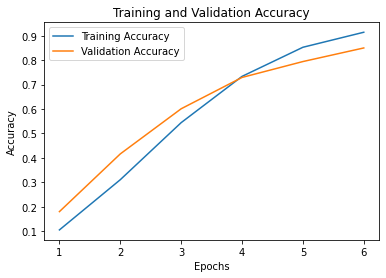

In [2]:
import matplotlib.pyplot as plt

# Training and validation accuracy values (example data)
epochs = [1, 2, 3, 4, 5, 6]  # Number of epochs
training_accuracy = [0.1048,0.3104,0.5440,0.7334,0.8526,0.9141]
validation_accuracy = [0.1797,0.4160,0.6008,0.7291,0.7941,0.8498]

# Plotting the graph
plt.plot(epochs, training_accuracy, label='Training Accuracy')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Displaying the graph
plt.show()

### DENSENET 169

In [45]:
df1=pd.DataFrame({'Actual class':act_cls,'DenseNet169-Predicted':pred_cls1,'Accuracy':acc1})
df1

,Actual class,DenseNet169-Predicted,Accuracy
0,Aashika,Nancy_Pelosi,0.112180
1,Alejandro Toledo,Alejandro_Toledo,0.999710
2,Andy Roddick,Andy_Roddick,0.999677
3,Angelina Jolie.jpeg,Angelina_Jolie,0.297557
4,Howard dean,Howard_Dean,0.999942
5,Venus williams,Venus_Williams,0.999382
6,laurabush,Laura_Bush,0.347149


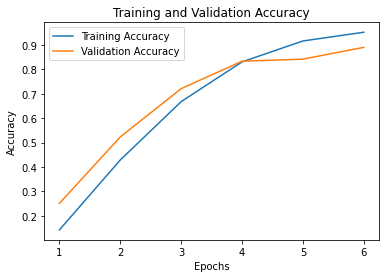

In [1]:
import matplotlib.pyplot as plt

# Training and validation accuracy values (example data)
epochs = [1, 2, 3, 4, 5, 6]  # Number of epochs
training_accuracy = [0.1428,0.4289,0.6675,0.8302,0.9157,0.9514]
validation_accuracy = [0.2515,0.5232,0.7207,0.8329, 0.8414,0.8895]

# Plotting the graph
plt.plot(epochs, training_accuracy, label='Training Accuracy')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Displaying the graph
plt.show()


## VGG-19

In [51]:
df=pd.DataFrame({'Actual class':act_cls,'VGG19-Predicted':pred_cls2,'Accuracy':acc2})
df


,Actual class,VGG19-Predicted,Accuracy
0,Aashika,Unknown,0.170321
1,Alejandro Toledo,George_W_Bush,0.068599
2,Andy Roddick,George_W_Bush,0.043683
3,Angelina Jolie.jpeg,Unknown,0.789160
4,Howard dean,George_W_Bush,0.074519
5,Venus williams,Unknown,0.115424
6,laurabush,Unknown,0.601814


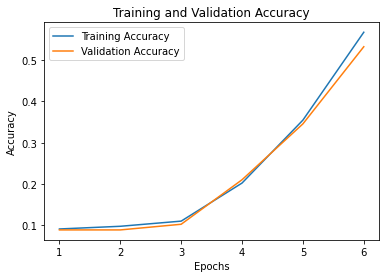

In [4]:
import matplotlib.pyplot as plt

# Training and validation accuracy values (example data)
epochs = [1, 2, 3, 4, 5, 6]  # Number of epochs
training_accuracy = [0.0909,0.0974,0.1099,0.2022,0.35478,0.5677]
validation_accuracy = [0.0886,0.0886,0.1023,0.2102,0.34563,0.5326]

# Plotting the graph
plt.plot(epochs, training_accuracy, label='Training Accuracy')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')

# Adding labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Displaying the graph
plt.show()


## LIVE VIDEO PREDICTION

In [8]:
def format_yolov5(frame):
    row, col, _ = frame.shape
    _max = max(col, row)
    result = np.zeros((_max, _max, 3), np.uint8)
    result[0:row, 0:col] = frame
    return result

In [9]:
classes = []
with open(r"D:\SEM 8\Miniproject\CODE\coco.txt", "r") as f:
    classes = f.read().splitlines()
len(classes)

80

In [ ]:
import cv2
import pyttsx3
import numpy as np
import shutil
import matplotlib.pyplot as plt

classes1=list(df['Class'].unique())
path=r"D:\SEM 8\Miniproject\CODE\Live video\Video"
test_datagen = ImageDataGenerator(rescale = 1./255)


# These functions return a model objects that we can use later on for predictions.
net = cv2.dnn.readNet(r"D:\SEM 8\Miniproject\CODE\yolov5s.onnx")
engine = pyttsx3.init()
# The Coco file has the names where the yolo algorithm can detect which means it contains the 80 object names.
# The file contains the labels of the classes which are pre trained models can classify.
classes = []
with open(r"D:\SEM 8\Miniproject\CODE\coco.txt", "r") as f:
    classes = f.read().splitlines()


# The input can be in three forms which is image, video,webcam.
# The videos and webcam are series of image files that we are fitting to yolo model.
cap = cv2.VideoCapture(0)
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size=(100, 3))

while True:
    pred_cls=[]
    result, image = cap.read()
    input_image = format_yolov5(image) # making the image square
    blob = cv2.dnn.blobFromImage(input_image , 1/255.0, (640, 640), swapRB=True)
    net.setInput(blob)
    predictions = net.forward()
    # step 3 - unwrap the predictions to get the object detections 

    class_ids = []
    confidences = []
    boxes = []

    output_data = predictions[0]
    image_width, image_height, _ = image.shape
    x_factor = image_width / 640
    y_factor =  image_height / 640
    
    for r in range(25200):
        row = output_data[r]
        confidence = row[4]
        if confidence >= 0.4:
            classes_scores = row[5:]
            _, _, _, max_indx = cv2.minMaxLoc(classes_scores)
            class_id = max_indx[1]
            if (classes_scores[class_id] > .25):
                confidences.append(confidence)
                class_ids.append(class_id)
                x, y, w, h = row[0].item(), row[1].item(), row[2].item(), row[3].item() 
                left = int((x - 0.5 * w) * x_factor)
                top = int((y - 0.5 * h) * y_factor)
                width = int(w * x_factor)
                height = int(h * y_factor)
                box = np.array([left, top, width, height])
                boxes.append(box)
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.3, 0.4) 

    result_class_ids = []
    result_confidences = []
    result_boxes = []
    
    for i in indexes:
        result_confidences.append(confidences[i])
        result_class_ids.append(class_ids[i])
        result_boxes.append(boxes[i])
        
    for i in range(len(result_class_ids)):
        box = result_boxes[i]
        class_id = result_class_ids[i]
        label =(classes[class_id])
        print(label,result_confidences[i])
        if label!='person':
            text=label+"is infront of you"
            engine.say(text)
            engine.runAndWait()
        elif label=='person': 
            for f in os.listdir(path):
                os.remove(os.path.join(path, f))
            result, image = cap.read()
            input_image = format_yolov5(image)
            rn=np.random.randint(0,1000)
            plt.imshow(image,cmap='gray')
            plt.axis('off')
            w=str(rn)+".jpg"
            new_path=path+"\\"+w
            plt.savefig(w,bbox_inches='tight')
            shutil.move(w,new_path)
            test = test_datagen.flow_from_directory(r"D:\SEM 8\Miniproject\CODE\Live video", target_size = (224,224), batch_size = 64, color_mode = 'rgb', class_mode = 'categorical',shuffle=False)
            p1=model1.predict(test)
            p2=model3.predict(test)
            for i in range(len(p1)):
                ind=np.argmax(p1[i])
                ind1=np.argmax(p2[i])
                a=p1[i][ind]
                b=p2[i][ind1]
                if a>b:
                    pred_cls.append([classes1[ind],a])
                    if a<0.20:
                        print('Unknown person is approaching you',a)
                        engine.say('Unknown person is approaching you')
                    else:
                        if classes1[ind]=='Unknown':
                            print(classes1[ind]+'person is approaching you',a)
                            engine.say(classes1[ind]+'person is approaching you')
                        else:
                            print(classes1[ind]+'is approaching you',a)
                            engine.say(classes1[ind]+'is approaching you')

                else:
                    pred_cls.append([classes1[ind1],b])
                    if b<0.20:
                        print('Unknown person is approaching you',b)
                        engine.say('Unknown person is approaching you')

                    else:
                        if classes1[ind]=='Unknown':
                            print(classes1[ind]+'person is approaching you',a)
                            engine.say(classes1[ind]+'person is approaching you')
                        else:
                            print(classes1[ind1]+'is approaching you',b) 
                            engine.say(classes1[ind]+'is approaching you')

        
        color = colors[i]
        cv2.rectangle(image, box, color, 2)
        cv2.rectangle(image, (box[0], box[1] - 20), (box[0] + box[2], box[1]), (0, 255, 255), -1)
        cv2.putText(image, classes[class_id], (box[0], box[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, .5, (0,0,0))
        cv2.putText(image, str(result_confidences[i]), (box[0]+60, box[1]), cv2.FONT_HERSHEY_SIMPLEX, .6, (0,0,0))
       
    cv2.imshow('Image', image)
    key = cv2.waitKey(1) # wait for 1 sec to go the next image of the video
    if key==1:
        break
        
cap.release()
cv2.destroyAllWindows()

person 0.86684823
Found 1 images belonging to 1 classes.
1/1 [==============================] - 1s 1s/step
Unknownperson is approaching you 0.12614441
bottle 0.6931588
bottle 0.6827915
person 0.86411947
Found 1 images belonging to 1 classes.
1/1 [==============================] - 0s 98ms/step
Unknown person is approaching you 0.18513551
bottle 0.7156647
bottle 0.64757586
bottle 0.44103903
person 0.44123703
Found 1 images belonging to 1 classes.
1/1 [==============================] - 0s 101ms/step
Unknown person is approaching you 0.15950814
chair 0.4212683
refrigerator 0.40161917
toilet 0.40955916
book 0.4776411
suitcase 0.4174502
laptop 0.6998432
bed 0.5363256
bed 0.48925948
teddy bear 0.6389456
person 0.5616515
Found 1 images belonging to 1 classes.
1/1 [==============================] - 0s 98ms/step
Unknownis approaching you 0.29635754
person 0.6253755
Found 1 images belonging to 1 classes.
1/1 [==============================] - 0s 97ms/step
Unknown person is approaching you 0.16988

Exception ignored in: <function BSTR.__del__ at 0x000002075FA62670>
Traceback (most recent call last):
  File "C:\Users\aashi\anaconda3\lib\site-packages\comtypes\__init__.py", line 999, in __del__
    def __del__(self, _free=windll.oleaut32.SysFreeString):
KeyboardInterrupt: 


bottle 0.4405703
person 0.8633766
Found 1 images belonging to 1 classes.
1/1 [==============================] - 0s 115ms/step
Julianne_Mooreis approaching you 0.25736636
bottle 0.6590521


Exception ignored in: <function BSTR.__del__ at 0x000002075FA62670>
Traceback (most recent call last):
  File "C:\Users\aashi\anaconda3\lib\site-packages\comtypes\__init__.py", line 999, in __del__
    def __del__(self, _free=windll.oleaut32.SysFreeString):
KeyboardInterrupt: 


bottle 0.5828274
bottle 0.5630669
person 0.8870415
Found 1 images belonging to 1 classes.
1/1 [==============================] - 0s 96ms/step
Unknown person is approaching you 0.16685903
bottle 0.6938891
bottle 0.6679566
bottle 0.53637594
person 0.8576856
Found 1 images belonging to 1 classes.
1/1 [==============================] - 0s 102ms/step
Unknown person is approaching you 0.15487543
bottle 0.70698875


## OVERALL ACCURACY

In [25]:
df=pd.DataFrame({'Models':['ResNet152v2','VGG-19','DenseNet169'],'Accuracy':[0.84978,0.54813,0.88945],'Loss':[0.701788,1.56795,0.49699]})
df

,Models,Accuracy,Loss
0,ResNet152v2,0.84978,0.701788
1,VGG-19,0.54813,1.567950
2,DenseNet169,0.88945,0.496990


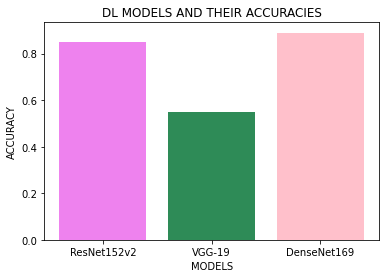

In [26]:
import matplotlib.pyplot as plt

# Sample data
x = ['ResNet152v2', 'VGG-19', 'DenseNet169']
y = [0.8497,0.5488,0.8894]

colors = ['violet', 'seagreen', 'pink']
# Create a bar plot
plt.bar(x, y,color=colors)

# Add labels and title
plt.xlabel('MODELS')
plt.ylabel('ACCURACY')
plt.title('DL MODELS AND THEIR ACCURACIES')

# Display the plot
plt.show()